# Imports

In [1]:
import sys
sys.path

['/home/poul/micromamba/envs/dpg25/lib/python311.zip',
 '/home/poul/micromamba/envs/dpg25/lib/python3.11',
 '/home/poul/micromamba/envs/dpg25/lib/python3.11/lib-dynload',
 '',
 '/home/poul/.local/lib/python3.11/site-packages',
 '/home/poul/micromamba/envs/dpg25/lib/python3.11/site-packages',
 '/home/poul/micromamba/envs/dpg25/lib/python3.11/site-packages/maxvolpy-0.3.8-py3.11-linux-x86_64.egg']

In [2]:
sys.path.insert(0, '..') # adds pyironflow

In [3]:
from pyiron_workflow import Workflow
from pyiron_nodes.atomistic.thermodynamics.landau.phases import LinePhase, IdealSolution
from pyiron_nodes.atomistic.thermodynamics.landau.plot import TransitionTemperature, CalcPhaseDiagram, PlotConcPhaseDiagram, PlotMuPhaseDiagram, PlotMuConcDiagram, PlotPhiMuDiagram
from pyiron_nodes.utilities import List5, Linspace

In [4]:
from pyironflow import PyironFlow

# Melting Point

In [9]:
wf = Workflow('LANDAU_Melting', delete_existing_savefiles=True)
wf.liquid = LinePhase("liquid", 0.0, 2.50, 1e-4)
wf.solid = LinePhase("solid", 0.0, 2.45, 1e-5)
wf.melting = TransitionTemperature(wf.liquid, wf.solid, Tmin=300, Tmax=1500)

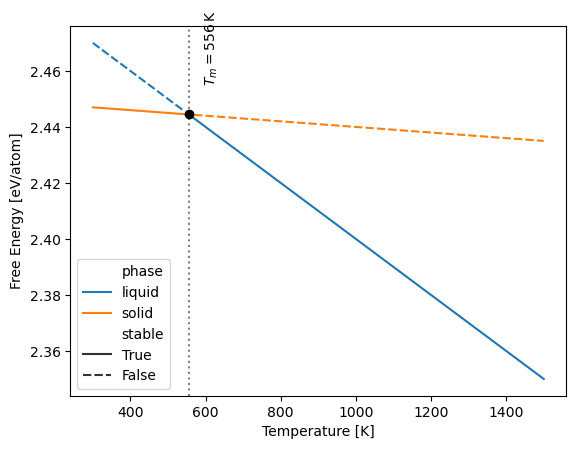

555.5555555555525

In [10]:
wf.melting.pull()

In [12]:
pf = PyironFlow([wf])
pf.gui

# Binary Phase Diagram

In [5]:
import numpy as np

In [11]:
wf = Workflow('LANDAU_BinaryPhaseDiagram', delete_existing_savefiles=True)
wf.liquid_a = LinePhase("liquid_a", 0.0, 2.50, 1e-4)
wf.liquid_b = LinePhase("liquid_b", 1.0, 3.10, 2e-4)
wf.liquid = IdealSolution("liquid", wf.liquid_a, wf.liquid_b)
wf.solid_a = LinePhase("solid_a", 0.0, 2.45, 1e-5)
wf.solid_b = LinePhase("solid_b", 1.0, 2.95, 1e-5)
wf.phases = List5(wf.liquid, wf.solid_a, wf.solid_b)
wf.linspace = Linspace(250, 1500, 100)
wf.phasedata = CalcPhaseDiagram(wf.phases, wf.linspace)
wf.diagram = PlotConcPhaseDiagram(wf.phasedata, plot_samples=True, plot_isolines=False)
wf.mudiagram = PlotMuPhaseDiagram(wf.phasedata)
wf.mucdiagram = PlotMuConcDiagram(wf.phasedata)
wf.phimudiagram = PlotPhiMuDiagram(wf.phasedata)

/home/poul/micromamba/envs/dpg25/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:557: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


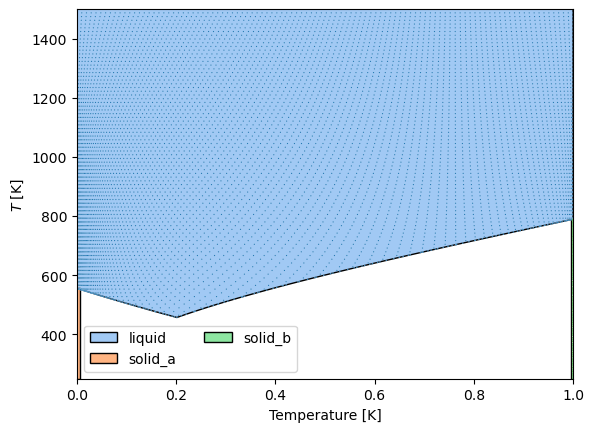

In [12]:
wf.diagram.pull()

In [13]:
pf = PyironFlow([wf])
pf.gui